<a href="https://colab.research.google.com/github/sharvarijiwtode/PRODIGY_GA/blob/main/PRODIGY_GA_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#STEP-01
!pip install torch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2 --index-url https://download.pytorch.org/whl/cu118
!pip install transformers datasets

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 456.5 kB/s eta 0:00:00


In [12]:
import torch
print( torch.__version__)
print(torch.cuda.is_available())
print(torch.version.cuda)
print(torch.backends.cudnn.version())

2.0.1+cu118
True
11.8
8700


In [14]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 454.9 kB/s eta 0:00:00


In [6]:
#STEP-02
import pandas as pd
df = pd.read_csv('/content/Articles.csv', encoding = 'ISO-8859-1')
print(df.columns)
df.head()

Index(['Article', 'Date', 'Heading', 'NewsType'], dtype='object')


,Article,Date,Heading,NewsType
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business


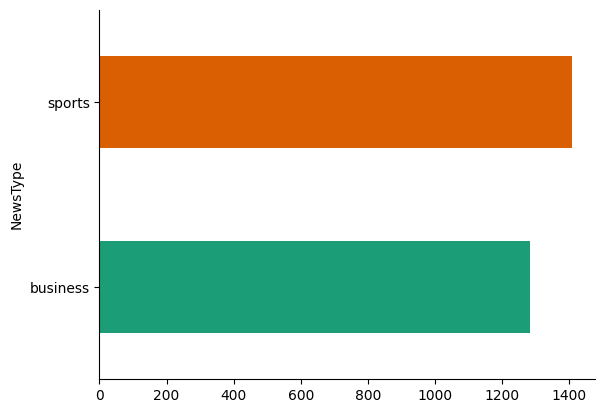

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('NewsType').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
#STEP-03
df['Article'] = df['Article'].astype(str)
df['Article'].to_csv('train_data.txt', index=False, header=False)

In [9]:
#STEP-04
from datasets import Dataset
with open("train_data.txt", "r", encoding="ISO-8859-1") as f:
  lines = f.readlines()
dataset = Dataset.from_dict({"text":lines})
dataset[0]

{'text': '"KARACHI: The Sindh government has decided to bring down public transport fares by 7 per cent due to massive reduction in petroleum product prices by the federal government, Geo News reported.Sources said reduction in fares will be applicable on public transport, rickshaw, taxi and other means of traveling.Meanwhile, Karachi Transport Ittehad (KTI) has refused to abide by the government decision.KTI President Irshad Bukhari said the commuters are charged the lowest fares in Karachi as compare to other parts of the country, adding that 80pc vehicles run on Compressed Natural Gas (CNG). Bukhari said Karachi transporters will cut fares when decrease in CNG prices will be made.                        \n'}

In [10]:
!pip uninstall torch -y
!pip cache purge

Found existing installation: torch 2.0.1+cu118
Uninstalling torch-2.0.1+cu118:
  Successfully uninstalled torch-2.0.1+cu118
Files removed: 2


In [11]:
#STEP-05
from transformers import GPT2Tokenizer
from datasets import Dataset
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token
def tokenize_function(batch):
  tokenized = tokenizer(batch["text"], padding="max_length", truncation=True, max_length=512)
  tokenized["labels"] = tokenized["input_ids"].copy()
  return tokenized

RuntimeError: Failed to import transformers.generation.utils because of the following error (look up to see its traceback):
No module named 'torch.sparse._triton_ops'

In [8]:
tokenized_dataset = dataset.map(tokenize_function, batched=True)
tokenized_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])
print(tokenized_dataset.column_names)

Map:   0%|          | 0/6844 [00:00<?, ? examples/s]

['text', 'input_ids', 'attention_mask', 'labels']


In [9]:
!pip install numpy==1.26.4

In [1]:
#STEP-06

from transformers import GPT2Tokenizer, GPT2LMHeadModel, Trainer, TrainingArguments
from datasets import load_dataset
import torch, os
os.environ["WANDB_DISABLED"] = "true"

tokenizer = GPT2Tokenizer.from_pretrained("gta2")
tokenizer.pad_token = tokenizer.eos_token
model = GPT2LMHeadModel.from_pretrained("gpt2")

dataset = load_dataset("trin_data.txt")

# Tokenization function
def tokenize_function(batch):
    tokenized = tokenizer(batch["text"], padding="max_length", truncation=True, max_length=512)
    tokenized["labels"] = tokenized["input_ids"].copy()
    return tokenized

# Tokenize and reduce dataset size
tokenized_dataset = dataset["train"].map(tokenize_function, batched=True)
tokenized_dataset = tokenized_dataset.select(range(500))  # Limit for speed
tokenized_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

# Training arguments
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=1,
    max_steps=100,
    per_device_train_batch_size=2,
    save_steps=500,
    logging_steps=10,
    save_total_limit=1,
    logging_dir="./logs",
    report_to="none",
    disable_tqdm=False
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset
)

trainer.train()

RuntimeError: Failed to import transformers.training_args because of the following error (look up to see its traceback):
No module named 'torch'